<a href="https://colab.research.google.com/github/TracyJi816/World-Bank-Data-by-Indicators/blob/master/Assignment_02_Xiao_Ji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Assignment 02  Bank Marketing Data Analysis** 

Firstly, we need import data set and clean it.

In [7]:
# Read the data
bankfull <- read.csv("bank-full.csv", sep = ";")


Warning message in file(file, "rt"):
“cannot open file 'bank-full.csv': No such file or directory”


ERROR: ignored

In [ ]:
str(bankfull)
## summarize a quick snapshot of our data set
summary(bankfull)
head(bankfull)


'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr  "married" "single" "married" "married" ...
 $ education: chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : chr  "yes" "yes" "yes" "yes" ...
 $ loan     : chr  "no" "no" "yes" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ y        : chr  "no" "no" "no" "no" ...


      age            job              marital           education        
 Min.   :18.00   Length:45211       Length:45211       Length:45211      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.94                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
   default             balance         housing              loan          
 Length:45211       Min.   : -8019   Length:45211       Length:45211      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   448   Mode  :character   Mode  :character  
                    Mean   :  1362                                        
                    3rd Qu.:  1428                                        
                    Max.   :1021

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


[1] 0

From the output shown above, we can see the different column names as well as possible factor values for each column. As already discussed in the exploratory data analysis, the binary variable ‘deposit’ is going to be out response variable while all the other variables – namely, age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous and poutcome are our covariates.

In [ ]:
## Check for missing values
sum(is.na(bankfull))

[1] 0

Here we could see that there is no missing values.

********Factor variables***********

NULL


       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9730          1487          1240          9454 
      retired self-employed      services       student    technician 
         2264          1579          4153           938          7595 
   unemployed 
         1303 

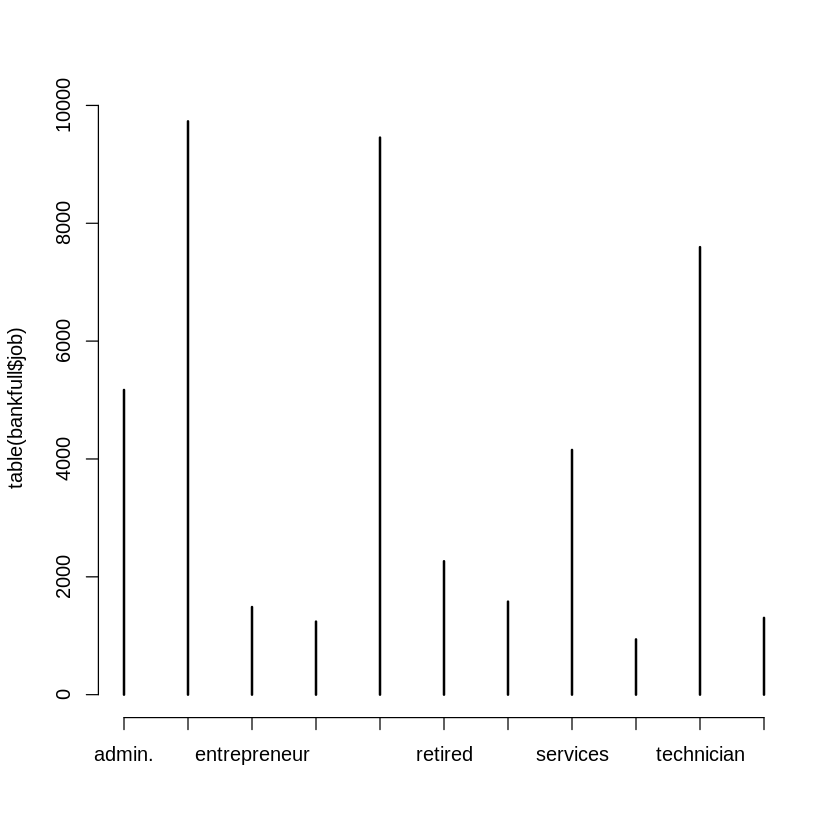

In [ ]:
## Get the levels of the factor variable
levels(bankfull$job)
table(bankfull$job)
plot(table(bankfull$job))

In [ ]:
## Generate 5 random categorical variables and add them as additional column to the data frame
newVarLevels = paste(rep("cat", 5), seq (1:5), sep = "_")
newVariable = sample(newVarLevels, nrow(bankfull), replace = TRUE)
str(newVariable)

 chr [1:45211] "cat_5" "cat_3" "cat_3" "cat_3" "cat_1" "cat_2" "cat_2" ...


In [ ]:
## Covert this into a factor variable
newVariable = as.factor(newVariable)
str(newVariable)
levels(newVariable)

 Factor w/ 5 levels "cat_1","cat_2",..: 5 3 3 3 1 2 2 2 3 1 ...


[1] "cat_1" "cat_2" "cat_3" "cat_4" "cat_5"

In [ ]:
## Append this new variable to the data frame
bankfull$newVariable = newVariable
str(bankfull)

'data.frame':	45211 obs. of  18 variables:
 $ age        : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job        : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital    : chr  "married" "single" "married" "married" ...
 $ education  : chr  "tertiary" "secondary" "secondary" NA ...
 $ default    : chr  "no" "no" "no" "no" ...
 $ balance    : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing    : chr  "yes" "yes" "yes" "yes" ...
 $ loan       : chr  "no" "no" "yes" "no" ...
 $ contact    : chr  NA NA NA NA ...
 $ day        : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month      : chr  "may" "may" "may" "may" ...
 $ duration   : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays      : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome   : chr  NA NA NA NA ...
 $ y          : chr  "no" "no" "no" "no" ...
 $ newVariable: Factor w/ 5 levels "cat_1","cat_2",..: 5 3 3 3 1 2 2 2 3 1 .

 int [1:45211] 58 44 33 47 33 35 28 42 58 43 ...


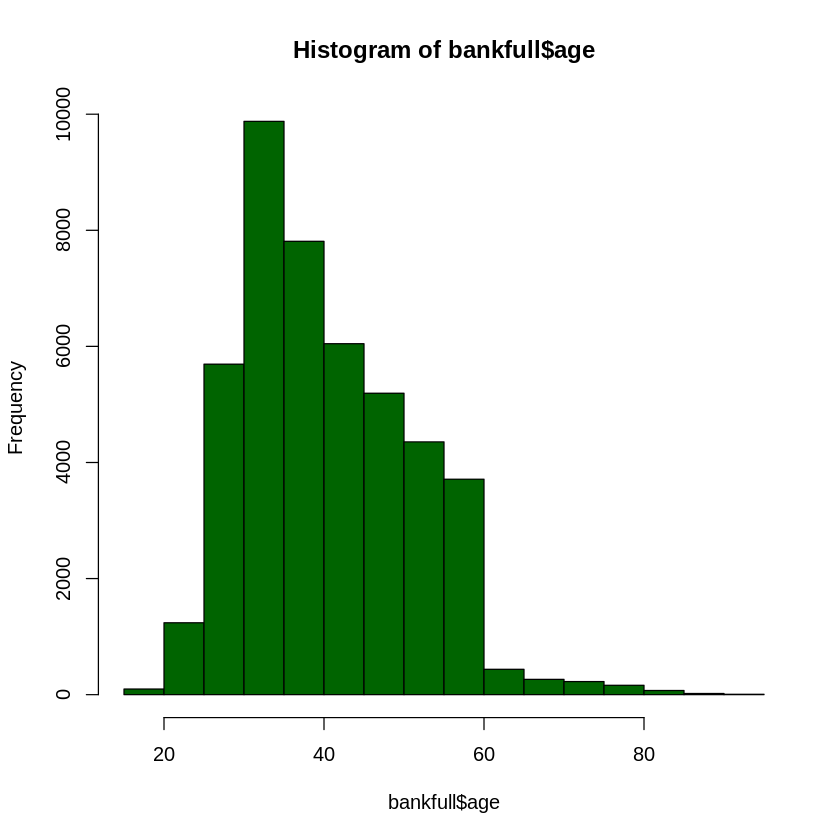

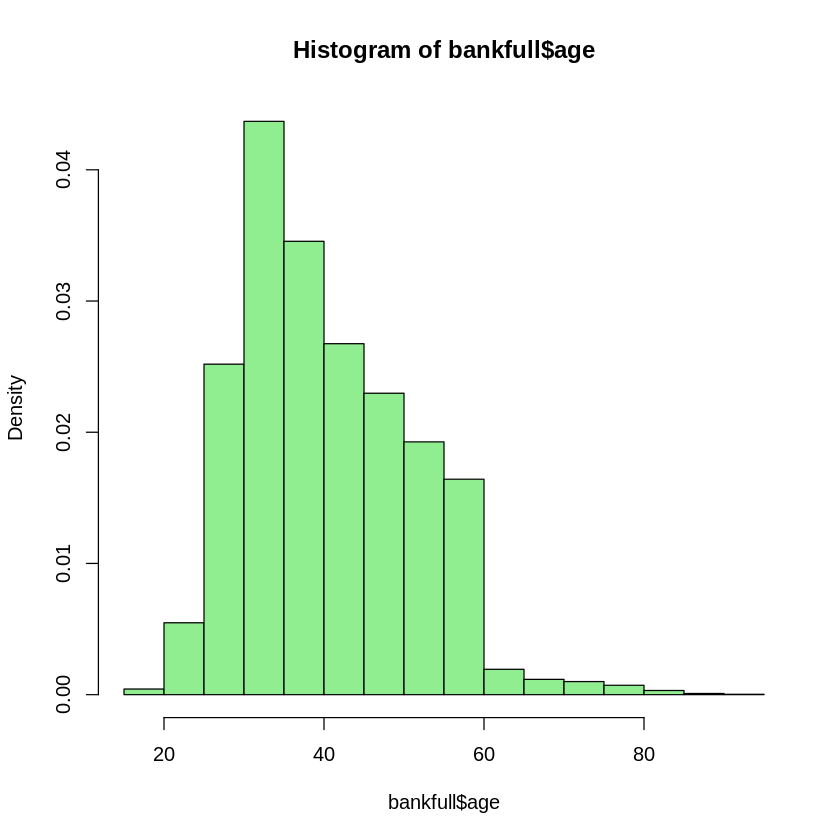

In [ ]:
## explore other continuous variables
str(bankfull$age)
hist(bankfull$age,col = "dark green")
hist(bankfull$age,col = "light green", freq = FALSE)

We can see that this has a heavy tail.

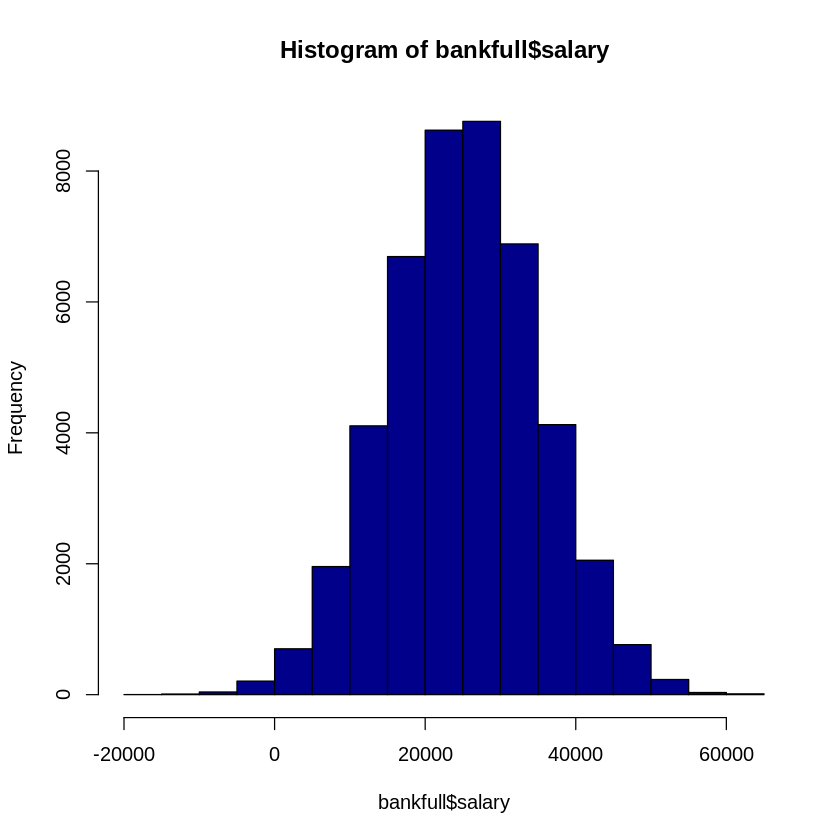

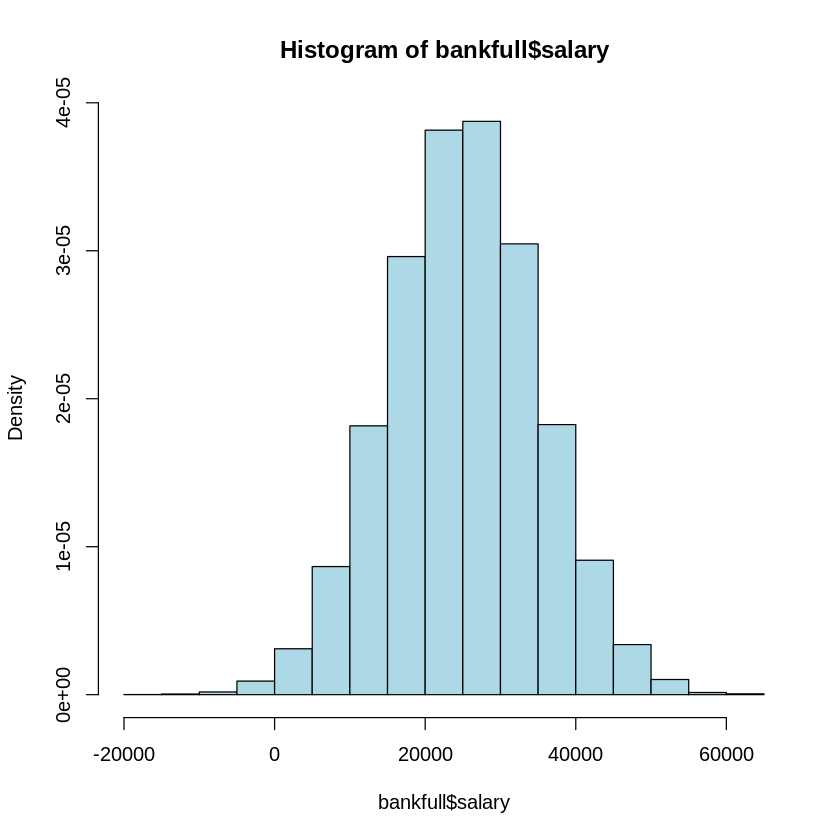

In [ ]:
## explore salary variable
bankfull$salary = rnorm(nrow(bankfull), mean = 25000, sd = 10000)
hist(bankfull$salary,col = "dark blue")
hist(bankfull$salary,col = "light blue", freq = FALSE)

In [ ]:
## Create new variable basd on other variables
yearBucket = ifelse(bankfull$month %in% c("jan", "feb", "mar", "apr", "may", "jun"), yes = "1st Half",no = "2nd Half")
bankfull$yearBucket = yearBucket

Bivariate Analysis

           
            divorced married single
  primary        752    5246    853
  secondary     2815   13770   6617
  tertiary      1471    7038   4792

           
            divorced married single
  primary      1.735  12.100  1.968
  secondary    6.493  31.762 15.263
  tertiary     3.393  16.234 11.053

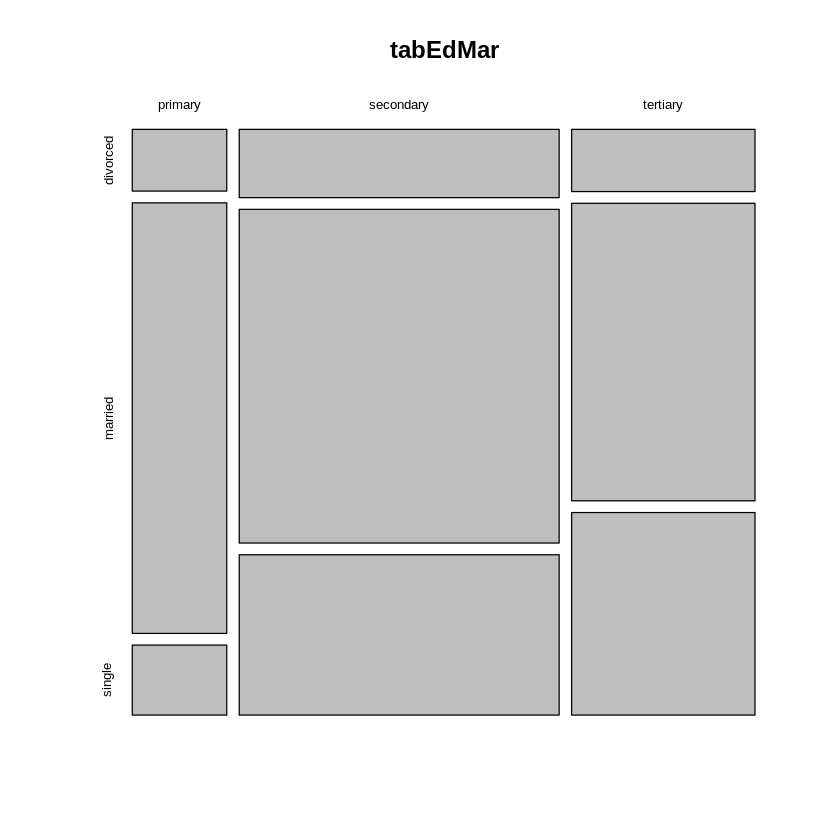

In [ ]:
## Let's look at the proporations across two categorical variables 
tabEdMar = table(bankfull$education, bankfull$marital)
tabEdMar
## Let's get the proportions of the entire population
round(prop.table(tabEdMar)*100,3)
## Plot this 
mosaicplot(tabEdMar)

Let's explore Salary on Age group.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



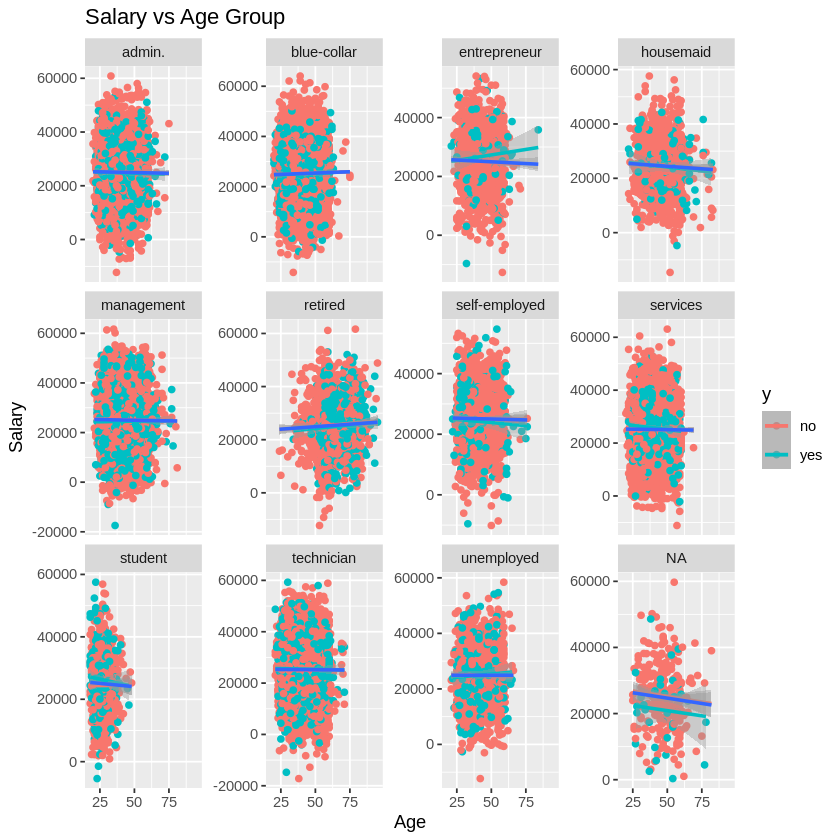

In [ ]:
library(ggplot2)
ggplot(bankfull, aes(x = age, y = salary, color = y)) + geom_point()+geom_smooth(method = lm) + geom_smooth(method= lm, aes(group = 1))+ facet_wrap(~job, scales = "free_y")+ labs( x = "Age", y = "Salary", title = "Salary vs Age Group")


From above graphics, we observe that age is not an element that has much difference between clients who took deposits from those who did not, their average is approximately 40 years.In the case of a type of job like retirees, students, unemployed and management positions are the ones who lead with better results to offer the financial product.

**Logistic Regression**

Since the aim here is to perform a predictive analysis, the dataset needs to be split into train and test data, so the model can be tested once it is created. Here, the data was split in an 80-20 ratio into trainData and testData.

a. Splitting Data into Train and Test

In [ ]:
index <- sample(nrow(bankfull), nrow(bankfull)*0.80) 

In [ ]:
trainData = bankfull[index,]
testData = bankfull[-index,] 

The code above first indexes 80% of the bankdata dataset. Then it takes all the indexed rows and creates a new dataset with it. This is our training data and it is stored in a data-frame called trainData.

The next time in the code creates testData which is our test dataset. This set will contain all the rows that were not indexed in bankdata.

The dimensions of each of these subsets was then checked.

In [ ]:
dim(trainData)

[1] 36161    20

In [ ]:
dim(testData)

[1] 9041   20

The code and output above show that the trainData dataset has 36161 rows and 20 columns and the testData dataset gas 9041 rows and 20 columns. The number of columns remains the same because the dataset was split vertically.

b. Creating the Model

Since the response variable is binary, the best course of action is to create a logistic regression model.

In [2]:
## Model 1:
bank_model1 <- glm(y ~ poutcome+previous+pdays+campaign+duration+month+day+contact+loan+housing+balance+education+marital+job+age, data = trainData, family = "binomial") 
summary(bank_model1)

ERROR: ignored

c. Backward Elimination

The process of backward elimination is used to remove covariates which do not significantly impact the outcome of the response variable. These are identified by looking at the p-value in the summary. The threshold for an acceptable p-value is 0.05. From the summary of bank_model1, it can be seen that the covariates ‘previous’, ‘pdays’, ‘day’, ‘marital’ and ‘age’ have bad p-values. Hence, these covariates can be removed while creating the second model.

d. Model creation after eliminating covariates

A second model – bank_model2 was created, containing only covariates with **significant p-values**.

In [ ]:
## Model 2:
bank_model2 <- glm(y ~ poutcome+campaign+duration+month+contact+loan+housing+balance+education+job, data = trainData, family = "binomial")  
summary(bank_model2)


Call:
glm(formula = y ~ poutcome + campaign + duration + month + contact + 
    loan + housing + balance + education + job, family = "binomial", 
    data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6302  -0.4752  -0.2953  -0.1664   2.7702  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.801e+00  2.333e-01 -12.007  < 2e-16 ***
poutcomeother       2.095e-01  1.019e-01   2.056 0.039739 *  
poutcomesuccess     1.996e+00  9.182e-02  21.738  < 2e-16 ***
campaign           -1.115e-01  3.058e-02  -3.648 0.000265 ***
duration            4.020e-03  1.747e-04  23.004  < 2e-16 ***
monthaug            9.228e-01  1.692e-01   5.456 4.88e-08 ***
monthdec            9.530e-01  3.040e-01   3.135 0.001717 ** 
monthfeb            2.572e-01  1.646e-01   1.563 0.118015    
monthjan           -4.295e-01  2.251e-01  -1.908 0.056335 .  
monthjul            1.237e+00  2.184e-01   5.663 1.49e-08 ***
monthjun            

e. Calculating prediction for all points in-sample

In [ ]:
pred_prob = predict(bank_model2, trainData, type = "response") 
pred_value = 1*(pred_prob>0.5)
cbind(trainData, pred_prob, pred_value) 

,age,job,marital,education,default,balance,housing,loan,contact,day,⋯,campaign,pdays,previous,poutcome,y,newVariable,salary,yearBucket,pred_prob,pred_value
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>
24878,48,management,married,tertiary,no,363,no,no,cellular,18,⋯,1,-1,0,NA,no,cat_2,30958.43,2nd Half,NA,NA
26127,49,technician,married,secondary,no,0,yes,no,cellular,19,⋯,2,-1,0,NA,no,cat_1,19737.23,2nd Half,NA,NA
4362,47,blue-collar,married,NA,no,-345,yes,no,NA,19,⋯,14,-1,0,NA,no,cat_3,30650.46,1st Half,NA,NA
31968,60,management,married,primary,no,252,yes,yes,cellular,13,⋯,2,147,3,failure,no,cat_5,30576.64,1st Half,0.02501285,0
37751,55,retired,married,primary,no,-966,no,yes,cellular,14,⋯,1,-1,0,NA,no,cat_2,32249.34,1st Half,NA,NA
15851,55,management,married,primary,no,57,no,yes,cellular,21,⋯,2,-1,0,NA,no,cat_2,25276.66,2nd Half,NA,NA
15966,27,services,divorced,secondary,no,10,yes,no,cellular,22,⋯,1,-1,0,NA,no,cat_3,26904.54,2nd Half,NA,NA
25431,56,management,married,tertiary,no,1390,yes,no,cellular,18,⋯,1,-1,0,NA,yes,cat_1,31572.57,2nd Half,NA,NA
3415,57,services,married,primary,no,3990,yes,no,NA,15,⋯,2,-1,0,NA,no,cat_1,27797.20,1st Half,NA,NA


Since the probabilities are given in the form of a percentage and we req uire a binary response, we assume that any probability greater than 50% i.e greater than 0.5 is a positiv e value – ‘yes’ in this case and any probability less than 0.5 is a negative value or a ‘no’. The pred_prob and pred_value are then bound to the trainData dataset using cbind().

f. Creating the Confusion Matrix for trainData 

A confusion matrix was created to check how adequate our logistic regression model was within the trainData.

In [ ]:

actual_value = trainData$y 
confusion_matrix = table(actual_value, pred_value) 
print(confusion_matrix)

            pred_value
actual_value    0    1
         no  4566  310
         yes  664  761


g. Calculating the Misclassification Error Rate

In [ ]:
misclassification_error_rate=1-sum(diag(confusion_matrix))/sum(confusion_matrix) 
print(misclassification_error_rate)

[1] 0.1545786


We can see above that the misclassification error rate for our confusion matrix is 0.15 which translates to a 15% error rate. This is an acceptable error rate and means that the model works for the given dataset.

h. Validating Model with Test Data

In [ ]:
pred_prob_test = predict(bank_model2, testData, type = "response")  
pred_value_test = 1*(pred_prob_test>0.5)
cbind(testData, pred_prob_test, pred_value_test) 

,age,job,marital,education,default,balance,housing,loan,contact,day,⋯,campaign,pdays,previous,poutcome,y,newVariable,salary,yearBucket,pred_prob_test,pred_value_test
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>
4,47,blue-collar,married,NA,no,1506,yes,no,NA,5,⋯,1,-1,0,NA,no,cat_3,30560.145,1st Half,NA,NA
14,58,technician,married,NA,no,71,yes,no,NA,5,⋯,1,-1,0,NA,no,cat_4,30576.752,1st Half,NA,NA
18,57,blue-collar,married,primary,no,52,yes,no,NA,5,⋯,1,-1,0,NA,no,cat_4,26595.974,1st Half,NA,NA
25,40,retired,married,primary,no,0,yes,yes,NA,5,⋯,1,-1,0,NA,no,cat_3,31038.775,1st Half,NA,NA
29,46,management,single,secondary,no,-246,yes,no,NA,5,⋯,2,-1,0,NA,no,cat_1,36273.414,1st Half,NA,NA
32,49,management,married,tertiary,no,378,yes,no,NA,5,⋯,1,-1,0,NA,no,cat_5,26661.199,1st Half,NA,NA
38,53,technician,married,secondary,no,-3,no,no,NA,5,⋯,1,-1,0,NA,no,cat_4,19525.189,1st Half,NA,NA
45,58,retired,married,NA,no,96,yes,no,NA,5,⋯,1,-1,0,NA,no,cat_3,38315.984,1st Half,NA,NA
47,58,self-employed,married,tertiary,no,-364,yes,no,NA,5,⋯,1,-1,0,NA,no,cat_4,33226.398,1st Half,NA,NA


i. Creating the confusion matrix for the testData dataset

In [ ]:
actual_value_test <- testData$y
confusion_matrix_test <- table(actual_value_test, pred_value_test) 
print(confusion_matrix_test) 

                 pred_value_test
actual_value_test    0    1
              no  1085   93
              yes  157  202


j. Calculating the Misclassification Error Rate for test data

In [ ]:
 misclassification_error_rate_test <- 1-sum(diag(confusion_matrix_test))/sum(confusion_matrix_test) 
 print(misclassification_error_rate_test) 

[1] 0.1626545


We can see above that the misclassification error rate for our confusion matrix is 0.16 which translates to a 16% error rate. This is an acceptable error rate and means that the model works for the given dataset.